In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | amapa
Processing Record 4 of Set 1 | lenki
City not found. Skipping...
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | beyneu
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mareeba
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | belmonte
Processing Record 18 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | buenos aires

Processing Record 32 of Set 4 | dabola
Processing Record 33 of Set 4 | geraldton
Processing Record 34 of Set 4 | brasileia
Processing Record 35 of Set 4 | asau
Processing Record 36 of Set 4 | saskatoon
Processing Record 37 of Set 4 | knysna
Processing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | smithers
Processing Record 41 of Set 4 | urumqi
Processing Record 42 of Set 4 | jabiru
City not found. Skipping...
Processing Record 43 of Set 4 | tijucas
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | conceicao do araguaia
Processing Record 47 of Set 4 | alugan
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | batemans bay
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | suratgarh
Processing Record 3 of Set 5 | santa maria
Pro

Processing Record 22 of Set 8 | asfi
Processing Record 23 of Set 8 | karachi
Processing Record 24 of Set 8 | warqla
City not found. Skipping...
Processing Record 25 of Set 8 | saldanha
Processing Record 26 of Set 8 | tura
Processing Record 27 of Set 8 | ribeira grande
Processing Record 28 of Set 8 | high rock
Processing Record 29 of Set 8 | nemuro
Processing Record 30 of Set 8 | podor
Processing Record 31 of Set 8 | una
Processing Record 32 of Set 8 | arman
Processing Record 33 of Set 8 | jibuti
Processing Record 34 of Set 8 | kutum
Processing Record 35 of Set 8 | leirvik
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | orocue
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | butembo
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | ciudad bolivar
Processing Record 43 of Set 8 | port augusta
Processing Record 44 of Set 8 | san pedro
Processing Record 45 

Processing Record 14 of Set 12 | san cristobal
Processing Record 15 of Set 12 | seoul
Processing Record 16 of Set 12 | sulya
Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | acobamba
Processing Record 19 of Set 12 | floro
Processing Record 20 of Set 12 | kysyl-syr
Processing Record 21 of Set 12 | kargil
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | zhanaozen
Processing Record 24 of Set 12 | tucupita
Processing Record 25 of Set 12 | atlantic city
Processing Record 26 of Set 12 | kotido
Processing Record 27 of Set 12 | sakaraha
Processing Record 28 of Set 12 | raudeberg
Processing Record 29 of Set 12 | codrington
Processing Record 30 of Set 12 | severn
Processing Record 31 of Set 12 | tonj
Processing Record 32 of Set 12 | ryotsu
Processing Record 33 of Set 12 | north adams
Processing Record 34 of Set 12 | lahat
Processing Record 35 of Set 12 | bardiyah
Processing Record 36 of Set 12 | safford
Processing Record 37 of Set 12 | kar

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.67,72,51,24.00,PF,2022-04-27 17:18:57
1,Amapa,1.0000,-52.0000,84.42,70,99,3.78,BR,2022-04-27 17:19:08
2,Kavieng,-2.5744,150.7967,82.96,78,36,15.12,PG,2022-04-27 17:19:09
3,Beyneu,45.3167,55.2000,70.56,33,94,15.79,KZ,2022-04-27 17:19:09
4,Georgetown,5.4112,100.3354,85.95,84,20,0.00,MY,2022-04-27 17:15:29
5,Brae,60.3964,-1.3530,45.10,65,52,9.42,GB,2022-04-27 17:19:10
6,Castro,-24.7911,-50.0119,78.71,50,3,8.86,BR,2022-04-27 17:19:10
7,Vaini,-21.2000,-175.2000,75.36,69,40,11.50,TO,2022-04-27 17:19:11
8,Albany,42.6001,-73.9662,49.78,47,62,4.00,US,2022-04-27 17:19:11
9,Mareeba,-17.0000,145.4333,72.32,91,24,2.51,AU,2022-04-27 17:19:12


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-27 17:18:57,-23.1203,-134.9692,77.67,72,51,24.00
1,Amapa,BR,2022-04-27 17:19:08,1.0000,-52.0000,84.42,70,99,3.78
2,Kavieng,PG,2022-04-27 17:19:09,-2.5744,150.7967,82.96,78,36,15.12
3,Beyneu,KZ,2022-04-27 17:19:09,45.3167,55.2000,70.56,33,94,15.79
4,Georgetown,MY,2022-04-27 17:15:29,5.4112,100.3354,85.95,84,20,0.00
5,Brae,GB,2022-04-27 17:19:10,60.3964,-1.3530,45.10,65,52,9.42
6,Castro,BR,2022-04-27 17:19:10,-24.7911,-50.0119,78.71,50,3,8.86
7,Vaini,TO,2022-04-27 17:19:11,-21.2000,-175.2000,75.36,69,40,11.50
8,Albany,US,2022-04-27 17:19:11,42.6001,-73.9662,49.78,47,62,4.00
9,Mareeba,AU,2022-04-27 17:19:12,-17.0000,145.4333,72.32,91,24,2.51


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

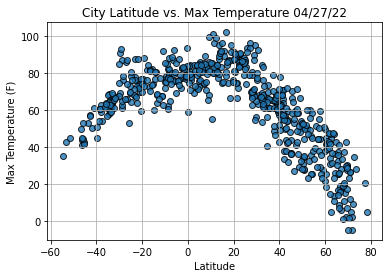

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

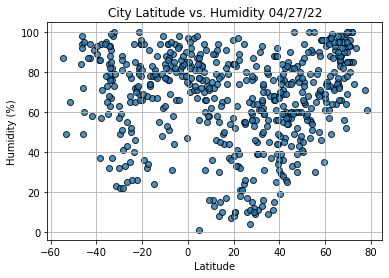

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

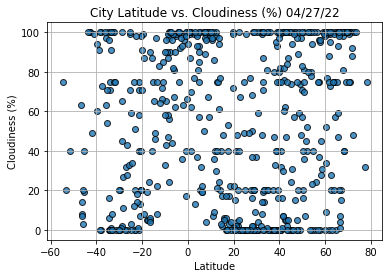

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

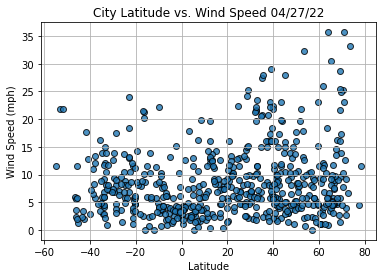

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Ostrovnoy
Country                        RU
Date          2022-04-27 17:19:13
Lat                       68.0531
Lng                       39.5131
Max Temp                    19.62
Humidity                       77
Cloudiness                     40
Wind Speed                  16.22
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Amapa,BR,2022-04-27 17:19:08,1.0000,-52.0000,84.42,70,99,3.78
3,Beyneu,KZ,2022-04-27 17:19:09,45.3167,55.2000,70.56,33,94,15.79
4,Georgetown,MY,2022-04-27 17:15:29,5.4112,100.3354,85.95,84,20,0.00
5,Brae,GB,2022-04-27 17:19:10,60.3964,-1.3530,45.10,65,52,9.42
8,Albany,US,2022-04-27 17:19:11,42.6001,-73.9662,49.78,47,62,4.00
...,...,...,...,...,...,...,...,...,...
557,Orikum,AL,2022-04-27 17:35:05,40.3253,19.4714,62.26,70,0,11.72
558,Mola Di Bari,IT,2022-04-27 17:35:06,41.0609,17.0873,68.32,84,1,7.45
561,Alcudia,ES,2022-04-27 17:35:07,39.8532,3.1214,71.20,67,100,5.55
564,Kodinsk,RU,2022-04-27 17:35:09,58.6881,99.1844,23.13,96,31,1.36


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

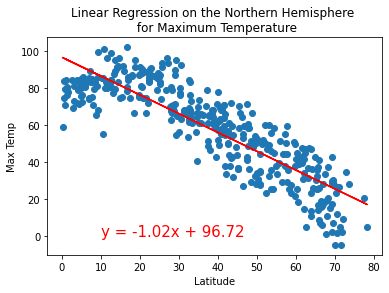

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

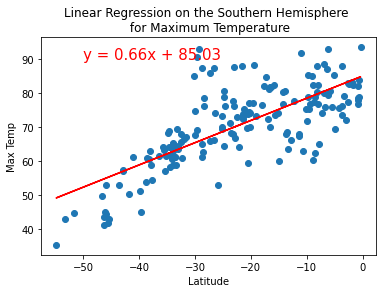

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

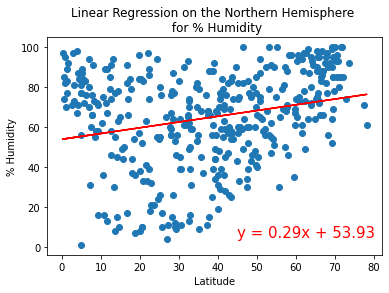

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,5))

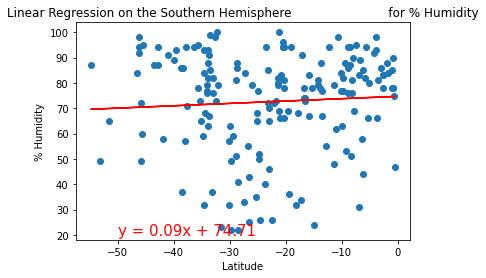

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

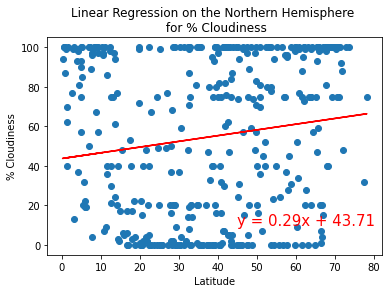

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

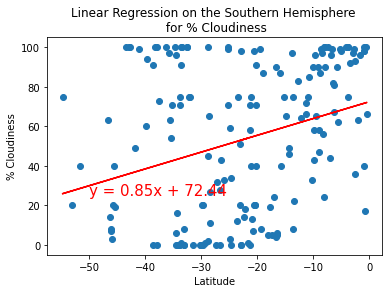

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

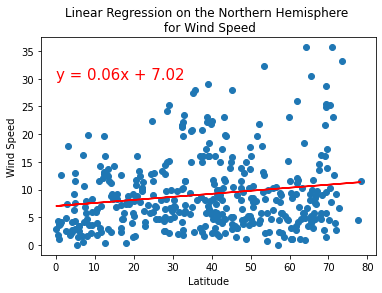

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

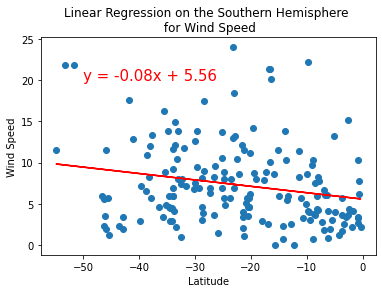

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))